In [1]:
# Step 1: Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Step 2: Download and Load Dataset (IMDB Reviews)
# Keep only top 10,000 most frequent words
num_words = 10000
maxlen = 200  # max review length

print("Loading dataset...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

# Pad sequences to ensure equal length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print("Data after padding:", X_train.shape, X_test.shape)

Loading dataset...
Training samples: 25000, Test samples: 25000
Data after padding: (25000, 200) (25000, 200)


In [3]:
# Step 3: Build RNN Model
model = Sequential([
    layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    layers.SimpleRNN(128, activation="tanh", return_sequences=False),
    layers.Dense(1, activation="sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Step 4: Compile and Train Model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5
313/313 [==============================] - 21s 66ms/step - loss: 0.6616 - accuracy: 0.5868 - val_loss: 0.6186 - val_accuracy: 0.6444
Epoch 2/5
313/313 [==============================] - 21s 66ms/step - loss: 0.4919 - accuracy: 0.7684 - val_loss: 0.6203 - val_accuracy: 0.6520
Epoch 3/5
313/313 [==============================] - 21s 66ms/step - loss: 0.5015 - accuracy: 0.7577 - val_loss: 0.5264 - val_accuracy: 0.7566
Epoch 4/5
313/313 [==============================] - 21s 66ms/step - loss: 0.3871 - accuracy: 0.8337 - val_loss: 0.5067 - val_accuracy: 0.7938
Epoch 5/5
313/313 [==============================] - 21s 66ms/step - loss: 0.3579 - accuracy: 0.8543 - val_loss: 0.5085 - val_accuracy: 0.7858


In [5]:
# Step 5: Perform Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

782/782 [==============================] - 9s 12ms/step


In [6]:
# Step 6: Calculate Performance Metrics
acc = accuracy_score(y_test, y_pred)
print("\n✅ Test Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


✅ Test Accuracy: 0.78488

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.78      0.78     12500
    Positive       0.78      0.79      0.79     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



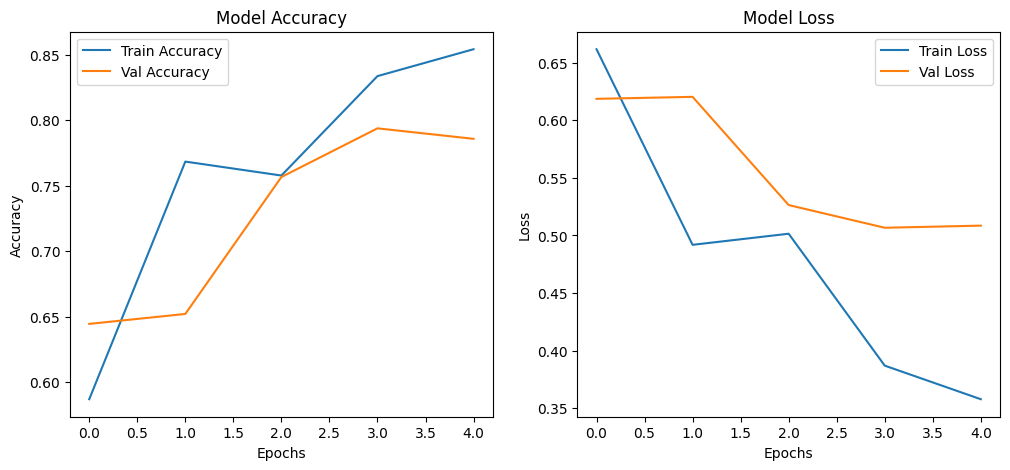

In [7]:
# Step 7: Visualization of Training
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()